### 8.2 Tensorflow and Keras

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
from tensorflow.keras.preprocessing.image import load_img

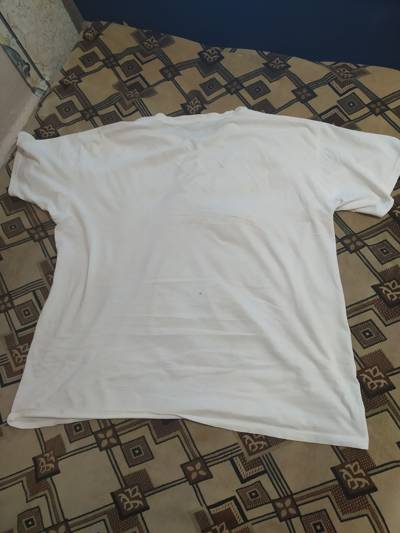

In [19]:
path = './clothing-dataset-small/train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [20]:
img = load_img(fullname, target_size=(299, 299))

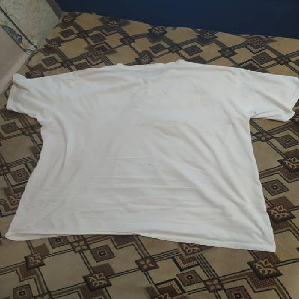

In [21]:
img

In [22]:
x = np.array(img)
x.shape

(299, 299, 3)

In [23]:
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

The image has the datayype uint8. 'u' means unsigned. Which means that the values are between 0 and 255. And int8 means it takes 8bits or 1 byte.

### 8.3 Pre-trained Convolutional Neural Networks

image-net.org - contains dataset of images and other commonly used subsets for images

keras.io/api/applications/ - contains pre-trained models

In [36]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [25]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1733203867.777712   15144 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4231 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [26]:
X = np.array([x])

In [27]:
X.shape

(1, 299, 299, 3)

In [30]:
X = preprocess_input(X)

In [31]:
X[0]

array([[[-0.2235294 , -0.2235294 , -0.31764704],
        [-0.09019607, -0.09019607, -0.18431371],
        [-0.10588235, -0.10588235, -0.19999999],
        ...,
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.827451  , -0.77254903, -0.64705884]],

       [[-0.16862744, -0.16862744, -0.26274508],
        [-0.05882353, -0.05882353, -0.15294117],
        [-0.04313725, -0.04313725, -0.1372549 ],
        ...,
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ]],

       [[-0.0745098 , -0.0745098 , -0.16862744],
        [-0.01960784, -0.01960784, -0.11372548],
        [ 0.0196079 ,  0.0196079 , -0.0745098 ],
        ...,
        [-0.8039216 , -0.7490196 , -0.62352943],
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.8117647 , -0.75686276, -0.6313726 ]],

       ...,

       [[-0.38039213, -0.4352941 , -0.58431375],
        [-0

In [33]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [37]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.9526401)),
  ('n04370456', 'sweatshirt', np.float32(0.009760026)),
  ('n04033995', 'quilt', np.float32(0.003174469)),
  ('n03710637', 'maillot', np.float32(0.0012294676)),
  ('n03188531', 'diaper', np.float32(0.0011785128))]]

In [34]:
pred.shape

(1, 1000)

In [35]:
pred

array([[7.92209266e-06, 2.29341149e-05, 1.85638455e-05, 1.21060302e-05,
        3.55526354e-05, 5.04396376e-05, 1.62474826e-05, 6.66064534e-06,
        1.18040516e-05, 8.65591664e-06, 1.63662025e-05, 9.83995596e-06,
        5.53209429e-06, 1.11219560e-05, 8.19871184e-06, 1.58362473e-05,
        2.06189161e-05, 7.27067800e-06, 1.09244629e-05, 1.35299406e-05,
        6.44589745e-05, 7.36716538e-06, 2.10518901e-05, 8.63634978e-06,
        1.72048603e-05, 2.21924147e-05, 1.01781261e-05, 1.47992032e-05,
        2.73888709e-05, 2.15671989e-05, 1.98430153e-05, 1.62405740e-05,
        1.79347389e-05, 3.21800217e-05, 3.57898134e-05, 2.96767448e-05,
        1.69016384e-05, 2.11803890e-05, 2.22338276e-05, 9.90219996e-06,
        5.81278755e-06, 3.34684410e-05, 1.10083274e-05, 1.24295375e-05,
        2.67433879e-05, 3.06453949e-05, 1.00951638e-05, 1.06622110e-05,
        1.49661710e-05, 2.61652676e-05, 3.30679868e-05, 1.40374168e-05,
        2.60186061e-05, 3.26023837e-05, 1.24906992e-05, 1.829114

Each of this number is the probability of the image belonging to a certain class.